<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-qi/blob/master/open_petrophysics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Open-Petrophysics**
Author: Yohanes Nuwara

Some codes are sourced from [petroGG github](https://github.com/petroGG/Basic-Well-Log-Interpretation). 

# 1. Setting up

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# 2. Import well data (LAS) and Markers file

We will import well data `KTB-01` for practice. The well data is in standard LAS format. A library called `lasreader` has been created in the Drive. Import it first to read our data. 

In [0]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')
import lasreader

Read LAS data

In [0]:
log = lasreader.LASReader("/content/drive/My Drive/Colab Notebooks/KTB-01.las", null_subs=np.nan)

We declare the depth

In [0]:
depth = log.data['DEPT']

**Lithology Markers**

Now that the LAS file has been successfully imported, we input the lithology markers. Markers are important to distinguish among different formations in the well data. 

In [0]:
tops = ('Ledok', 'Wonocolo', 'Ngrayong', 'Tawun', 'Kujung')
tops_depths = (275, 340, 1053, 1637, 2777)

**Dataframing**

We can convert our LAS data into a dataframe, just like an Excel spreadsheet. Creating dataframe (using library `pandas`). For example we would like to make a dataframe consists of GR, Perm, DT, PHIE, Vsh, and NPHI. You can add the data yourself. 

In [0]:
import pandas as pd

logfile = pd.DataFrame({"Depth":log.data['DEPTH'], "GR":log.data['GR'], "Perm":log.data['Permeability'], "DT":log.data['DT'],  
                        "NPHI":log.data['NPHI'], "LLD":log.data['LLD']})

# 3. Visualizing Log Data

Visualize the well log. First we would like to have the lithology markers appearing in our well data. We create a function to make it appear first.

In [0]:
def attribute(depth, tops, tops_depths, fig, ax):

  for axes in ax:
        axes.set_ylim (min(depth), max(depth))
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False) 
        for (i,j) in zip(tops_depths,tops):
            if ((i>=min(depth)) and (i<=max(depth))):
                axes.axhline(y=i, linewidth=0.5, color='black')
                axes.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')

Perfect. Let's visualize our well data. For example we would like to view bulk laterolog density log (RHOB), deep resistivity log (LLD), and sonic log (DT)

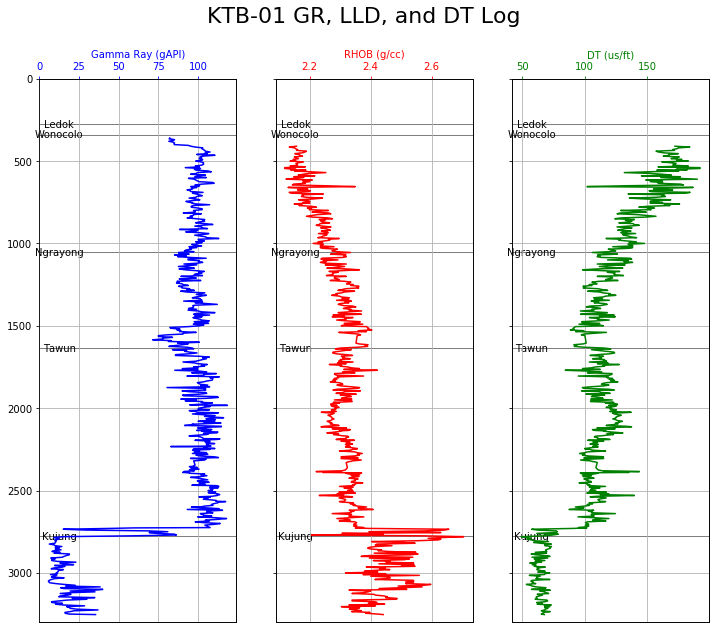

In [0]:
from matplotlib.ticker import AutoMinorLocator

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,10), sharey=True)

# markers attribute function that we made is posted here
attribute(depth, tops, tops_depths, fig, ax)

plt.figure(1)
plt.suptitle("KTB-01 GR, LLD, and DT Log", fontsize=22)

# First column first well data
ax01=ax[0].twiny()
ax01.spines['top'].set_position(('outward',0))
ax01.set_xlabel("Gamma Ray (gAPI)")
ax01.plot(log.data['GR'], depth, label='Gamma Ray (gAPI)', color='blue')
ax01.set_xlabel('Gamma Ray (gAPI)',color='blue')    
ax01.tick_params(axis='x', colors='blue')
ax01.grid(True)

# Second column second well data
ax11=ax[1].twiny()
ax11.set_xscale('log') # visualization of resistivity has log scale x axis
ax11.grid(True)
ax11.spines['top'].set_position(('outward',0))
ax11.set_xlabel('LLD (ohm.m)', color='red')
ax11.plot(log.data['LLD'], depth, label='LLD (ohm.m)', color='red')
ax11.tick_params(axis='x', colors='red')

# Third column third well data
ax21=ax[2].twiny()
ax21.grid(True)
ax21.spines['top'].set_position(('outward',0))
ax21.set_xlabel('DT (us/ft)')
ax21.plot(log.data['DT'], depth, label='DT (us/ft)', color='green')
ax21.set_xlabel('DT (us/ft)', color='green')    
ax21.tick_params(axis='x', colors='green')

Beatifully! However, the **LLD data is not complete** (missing values above depth ~2700 m). So we will cover the analysis only below ~ 2700 m or in Kujung Formation. 

In [0]:
topkujung = tops_depths[4]
topkujung

2777

**Cross plot logs**

Another useful representation of well log is cross plot. Let's make a cross plot. 

In [0]:
def xplot(axisx, axisy, axisz):
  plt.scatter(axisx, axisy, c=axisz, s=5, cmap='gist_rainbow')
  plt.colorbar()

Text(0, 0.5, 'RHOB  (g/cc)')

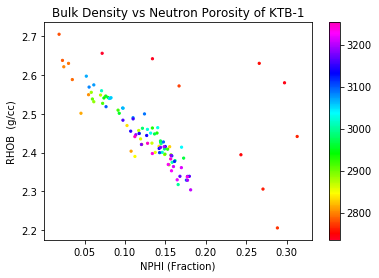

In [0]:
# crossplot RHOB vs NPHI
axisx = log.data['NPHI']
axisy = log.data['RHOB']
axisz = depth

xplot(axisx, axisy, axisz)
plt.title('Bulk Density vs Neutron Porosity of KTB-1')
plt.xlabel('NPHI (Fraction)'); plt.ylabel('RHOB  (g/cc)')

**Visualize all crossplots!**

We have created a Panda dataframe consisting of GR, Perm, DT, PHIE, Vsh, and NPHI. We will show crossplots of each log. Let's use `seaborn` library.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


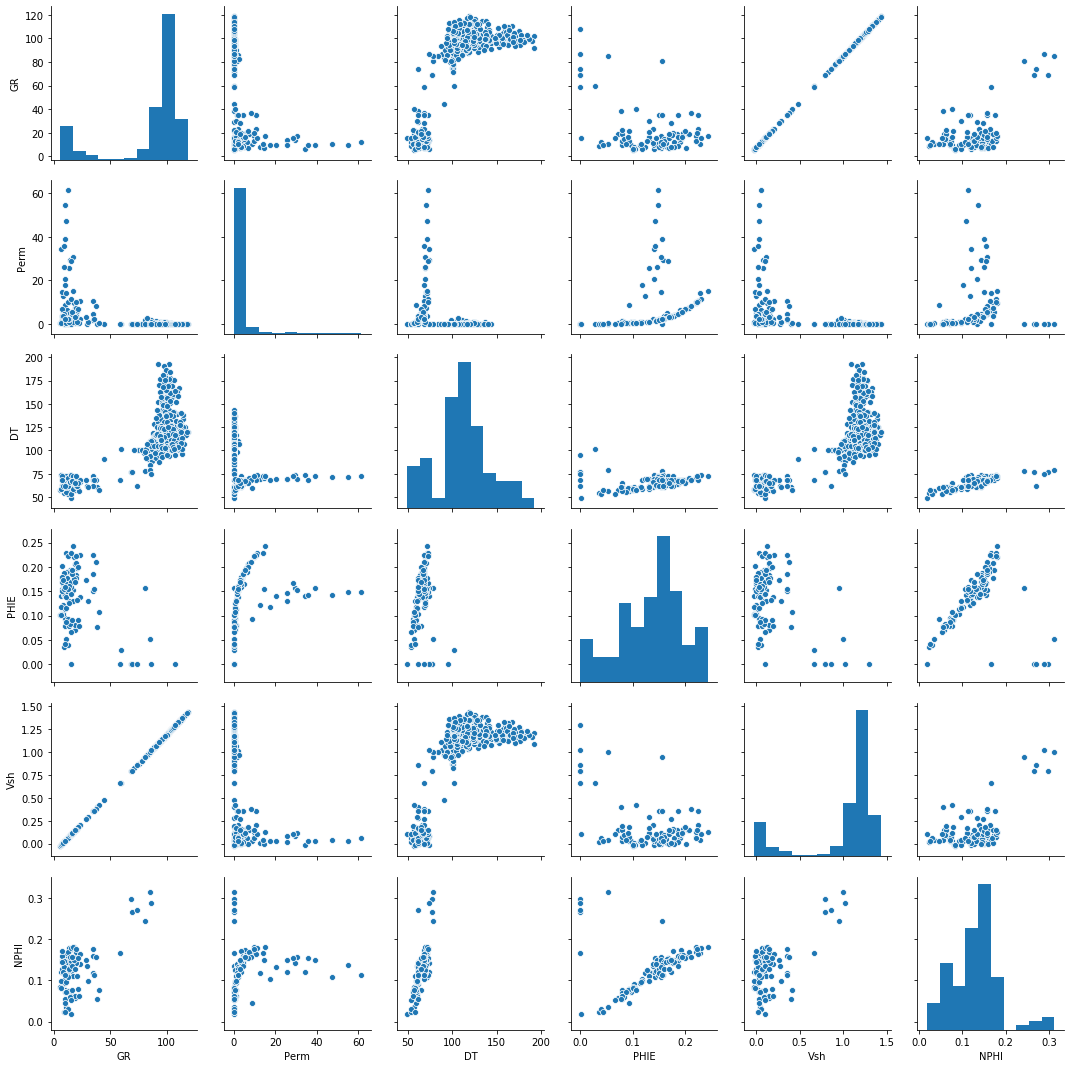

In [0]:
import seaborn as sns

sns.pairplot(logfile)

N.B. The crossplots still doesn't have proper color attributed to the depth that each point corresponds. Still improve the `seaborn` crossplot. 

# 4. QC / Adding Data to Missing Values

In our `KTB-01` data, Deep Resistivity (LLD) data have incomplete data. 

Often in field well data acquisition, well data are collected separately. This causes some well data has missing interval, although there are other records that cover that missing interval. 

We fortunately have additional `KTB_1new` LAS data that cover the LLD value in the missing interval. Import it right away. 

In [0]:
LLD_new = lasreader.LASReader("/content/drive/My Drive/Colab Notebooks/KTB_1new.LAS", null_subs=np.nan)

# Make dataframe of LLD
LLDfile = pd.DataFrame({"LLD":LLD_new.data['LLD']})

We will check the dimension of the LLD data from `KTB-01` and the newly imported and more complete `KTB1_new`

In [0]:
log.data['LLD'].shape, LLD_new.data['LLD'].shape

((696,), (29713,))

It has different dimension, 696 and 29713. What are we gonna do? We adjust the new data into our original `KTB-01` dimension. Technique? **Interpolation**. 

In [0]:
"2D Interpolator"
from scipy import interpolate

def interp(x_new, x_old, y_old):
    tck = interpolate.splrep(x_old, y_old, s=0)
    y_new = interpolate.splev(x_new, tck, der=0)
    return(x_new, y_new)

In [0]:
x_new = log.data['DEPTH']
x_old = LLD_new.data['DEPT']
y_old = LLD_new.data['LLD']
LLD = interp(x_new, x_old, y_old)

In [0]:
pressurenew = np.linspace(0, 300000, 3000)

def interp(pressurenew):
  # SCAL input data
  pressure_scal = LLD_new.data['DEPT']
  K_scal = LLD_new.data['LLD']
    
  # interpolation
  tck = interpolate.splrep(pressure_scal, K_scal, s=2)
  compressibility_interp = interpolate.splev(pressurenew, tck, der=2)
  return(pressure_scal, K_scal, compressibility_interp)

pressure_scal, K_scal, c = interp(pressurenew)
plt.plot(K_scal, pressure_scal, 'o', pressurenew, c)
plt.xscale("log")
plt.gca().invert_yaxis()
c

# 5. Create Shale Volume Log (VSH)

Calculate VSH from Gamma Ray (GR). 

In [0]:
GRmin = logfile.GR.min()
GRmax = logfile.GR.max()
VSH = (logfile.GR - GRmin) / (GRmax - GRmin)

Adding VCL to the dataframe

In [0]:
VSH = np.array(VSH)
logfile['VSH'] = VSH
logfile

,Depth,GR,Perm,DT,NPHI,LLD,VSH
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
691,3240.000000,16.021753,4.4897,66.966476,0.133901,7.622900,0.092044
692,3245.000000,16.225132,5.2865,67.188301,0.156603,6.729800,0.093844
693,3250.000000,18.759167,2.9285,65.411880,0.128000,9.459500,0.116274
694,3253.000000,35.371067,2.0367,67.889717,0.112279,10.007000,0.263310


# 6. Quick Look Shale - Sandstone - Limestone

**Cross plot VSH vs VP log.**

VSH is shale volume that we have derived before. VP is P-velocity log, that is derived from DTC or DT log (delta-time compressional sonic log). Visualizing in VP is more convenient than DT, so let's derive the VP log. 

In [0]:
# if DT in your LAS file has unit microsecond/feet (us/ft), conversion to m/s use this
VP = 1E+06 / log.data['DT'] * 0.3048

# if DT not in us/ft, convert first to us/ft. 

Adding VP to the dataframe

In [0]:
VP = np.array(VP)
logfile['VP'] = VP
logfile

,Depth,GR,Perm,DT,NPHI,LLD,VSH,VP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
691,3240.000000,16.021753,4.4897,66.966476,0.133901,7.622900,0.092044,4551.531097
692,3245.000000,16.225132,5.2865,67.188301,0.156603,6.729800,0.093844,4536.504050
693,3250.000000,18.759167,2.9285,65.411880,0.128000,9.459500,0.116274,4659.703982
694,3253.000000,35.371067,2.0367,67.889717,0.112279,10.007000,0.263310,4489.634263


Text(0, 0.5, 'Shale Volume (fraction)')

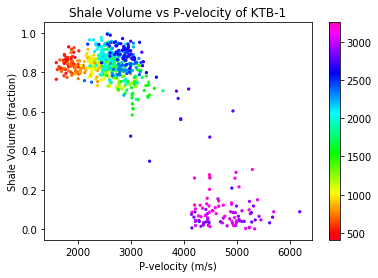

In [0]:
# crossplot VSH vs DT
axisx = VP
axisy = VSH
axisz = depth

xplot(axisx, axisy, axisz)
plt.title('Shale Volume vs P-velocity of KTB-1')
plt.xlabel('P-velocity (m/s)'); plt.ylabel('Shale Volume (fraction)')

**Crossplot LLD vs VP log**

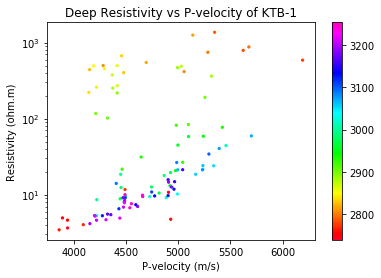

In [0]:
# crossplot LLD vs VP
axisx = VP
axisy = log.data['LLD']
axisz = depth

xplot(axisx, axisy, axisz)
plt.title('Deep Resistivity vs P-velocity of KTB-1')
plt.xlabel('P-velocity (m/s)'); plt.ylabel('Resistivity (ohm.m)')
plt.yscale("log")

**Crossplot Resistivity - Sonic P - Gamma Ray**

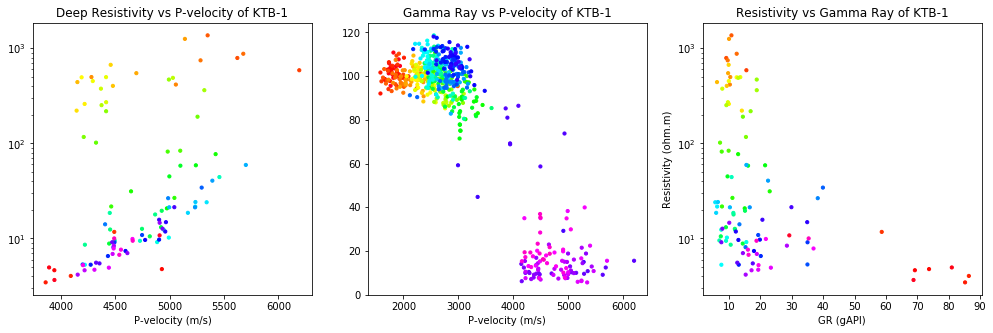

In [0]:
fig, ax = plt.subplots(3, figsize=(17,5))

ax[0] = plt.subplot(131)
ax[1] = plt.subplot(132)
ax[2] = plt.subplot(133)

im = ax[0].scatter(VP, log.data['LLD'], c=depth, s=10, cmap='gist_rainbow')
im = ax[0].set_title('Deep Resistivity vs P-velocity of KTB-1')
im = ax[0].set_xlabel('P-velocity (m/s)'); plt.ylabel('Resistivity (ohm.m)')
im = ax[0].set_yscale("log")
# fig.colorbar(im, ax=ax)
# ax[0].colorbar()

am = ax[1].scatter(VP, log.data['GR'], c=depth, s=10, cmap='gist_rainbow')
am = ax[1].set_title('Gamma Ray vs P-velocity of KTB-1')
am = ax[1].set_xlabel('P-velocity (m/s)'); plt.ylabel('GR (gAPI)')
# fig.colorbar(am, ax=ax)
# ax[1].colorbar()

jm = ax[2].scatter(log.data['GR'], log.data['LLD'], c=depth, s=10, cmap='gist_rainbow')
jm = ax[2].set_title('Resistivity vs Gamma Ray of KTB-1')
jm = ax[2].set_xlabel('GR (gAPI)'); plt.ylabel('Resistivity (ohm.m)')
jm = ax[2].set_yscale("log")
# fig.colorbar(jm, ax=ax)
# ax[2].colorbar()

For this cross plot, we shall differentiate clay-rich and clay-less lithologies.

# 7. Quick Look Triple Combo - Fluid

We will use **Six Ko Ko rule**. Six Ko Ko rule is a technique for quick look of whether brine (water) or oil or gas fill the lithology, or in other words quick indicator of hydrocarbon-bearing lithology.

You may read an interesting manual about it in LinkedIn: https://www.linkedin.com/pulse/six-ko-rules-easily-detect-oil-gas-water-from-well-log-dosh-nazlan/

**Triple Combo** consists of Gamma Ray, Resistivity, and Density-Neutron logs. We will create Triple Combo.

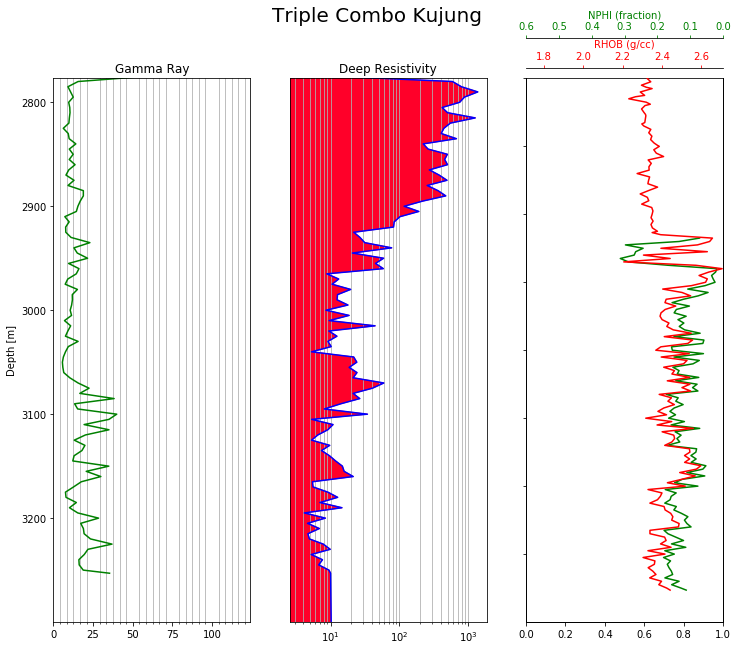

In [0]:
from matplotlib.ticker import AutoMinorLocator

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,10), sharey=True)

plt.figure(1)
plt.suptitle("Triple Combo Kujung", size=20)

plt.subplot(1, 3, 1)
plt.plot(log.data['GR'], log.data['DEPTH'], 'g')
plt.title('Gamma Ray')
plt.gca().xaxis.grid(True, which="minor")
minorLoc = AutoMinorLocator(6)
plt.gca().xaxis.set_minor_locator(minorLoc)
plt.ylabel("Depth [m]")
plt.ylim(topkujung, max(depth))
plt.gca().invert_yaxis() # invert y axis from positive to negative

plt.subplot(1, 3, 2)
plt.plot(log.data['LLD'], log.data['DEPTH'], 'b')
plt.title('Deep Resistivity')
plt.gca().xaxis.grid(True, which="minor")
minorLoc = AutoMinorLocator(6)
plt.gca().xaxis.set_minor_locator(minorLoc)
plt.gca().axes.get_yaxis().set_ticks([])
plt.xscale("log")
plt.grid()
plt.ylim(topkujung, max(depth))
plt.gca().invert_yaxis()

####################################
import matplotlib as mpl
cmap = mpl.cm.gist_rainbow
normalize = mpl.colors.Normalize(vmin=depth.min(), vmax=depth.max())
plt.fill_betweenx(log.data['DEPTH'],0,log.data['LLD'], color=cmap(normalize(depth)))
###################################

ax22=ax[2].twiny()
ax22.set_xlim(0,0.6)
ax22.invert_xaxis()
ax22.plot(log.data['NPHI'], log.data['DEPTH'], label='NPHI (fraction)', color='green') 
ax22.spines['top'].set_position(('outward',40))
ax22.set_xlabel('NPHI (fraction)', color='green')    
ax22.tick_params(axis='x', colors='green')
plt.ylim(topkujung, max(depth))
ax22.invert_yaxis()
    
ax23=ax[2].twiny()
ax23.set_xlim(1.71,2.71)
ax23.plot(log.data['RHOB'], log.data['DEPTH'] ,label='RHOB (g/cc)', color='red') 
ax23.spines['top'].set_position(('outward',10))
ax23.set_xlabel('RHOB (g/cc)',color='red')
ax23.tick_params(axis='x', colors='red')
plt.ylim(2500, max(depth))
ax22.invert_yaxis()

**High resistivity** usually indicates hydrocarbon-bearing (in low GR, low GR = reservoir, non-shaly). Thus, in interval 2777 to around 2950 m may indicate hydrocarbon. We can interpret a **water line** (contact between water-filled and hydrocarbon-filled lithology) exists at about 2950 m. 

We declare the water line

In [0]:
water_line = 2950

# 8. Lithology Check and Density Matrix Investigation

To estimate the type of matrix, we use crossplot of RHOB and NPHI. Matrix density is important for the next part: Calculation of effective porosity (PHIE).

We will make a **"RHOB - NPHI cross matrix template"**, as most petrophysicist use. For reference, you may read Crain Ross webpage (https://www.spec2000.net/12-phint.htm).

In [0]:
"RHOB - NPHI cross matrix template"

def deeplook(denfl):
  lsX = np.linspace(0,0.45,46)

  ssSNP = 0.222*lsX**2 + 1.021*lsX + 0.024
  dolSNP = 0.6*lsX**2 + 0.749*lsX - 0.00434

  ssCNL = 0.222*lsX**2 + 1.021*lsX + 0.039
  dolCNL = 1.40*lsX**2 + 0.389*lsX - 0.01259

  ssSnpX = np.empty((np.size(lsX),0), float)
  dolSnpX = np.empty((np.size(lsX),0), float)
  ssCnlX = np.empty((np.size(lsX),0), float)
  dolCnlX = np.empty((np.size(lsX),0), float)

  for i in np.nditer(lsX):
      ssSnpX = np.append(ssSnpX, np.roots([0.222, 1.021, 0.024 - i])[1])
      dolSnpX = np.append(dolSnpX, np.roots([0.6, 0.749, -0.00434 - i])[1])
      ssCnlX = np.append(ssCnlX, np.roots([0.222, 1.021, 0.039 - i])[1])
      dolCnlX = np.append(dolCnlX, np.roots([1.40, 0.389, -0.01259 - i])[1])

  densma_Ls = 2.71; densma_Ss = 2.65; densma_Dol = 2.87 #densma: density matrix

  denLs = (denfl - densma_Ls) * lsX + densma_Ls
  denSs = (denfl - densma_Ss) * lsX + densma_Ss
  denDol = (denfl - densma_Dol) * lsX + densma_Dol

  %matplotlib inline

  fig, ax = plt.subplots(2, figsize=(14,6))

  ax[0] = plt.subplot(121)
  ax[1] = plt.subplot(122)

  #Setting for first Chart (Neutron Porosity equivalent curves)
  ax[0].set_title("Similar with Chart Por-13a")
  ax[0].set_xlabel("Apparent Limestone Porosity [v.v]")
  ax[0].set_ylabel("True Porosity [v.v]")
  ax[0].set_xlim(-0.05,0.40)
  ax[0].set_ylim(0,0.40)

  ax[0].plot(ssSnpX, lsX, '-', color='blue', label = 'Sandstone-SNP')
  ax[0].plot(ssCnlX, lsX, '--', color='blue', label = 'Sandstone-CNL')
  ax[0].plot(lsX, lsX, '-', color='black', label = 'Limestone')
  ax[0].plot(dolSnpX, lsX, '-', color='red', label = 'Dolomite-SNP')
  ax[0].plot(dolCnlX, lsX, '--', color='red', label = 'Dolomite-CNL')
  ax[0].legend(loc='best')
  ax[0].grid(True)

  #Settings for second chart (Neutron Density)
  ax[1].set_title("ND Crossplot - Chart Por-1e")
  ax[1].set_xlabel("Neutron Porosity [v.v]")
  ax[1].set_ylabel("Density g/cc")
  ax[1].set_xlim(-0.05,0.45)
  ax[1].set_ylim(3,1.9)
  ax[1].plot(ssCnlX, denSs, '.-', color='blue', label = 'Sandstone')
  ax[1].plot(lsX, denLs, '.-', color='black', label = 'Limestone')
  ax[1].plot(dolCnlX, denDol, '.-', color='red', label = 'Dolomite')
  ax[1].legend(loc='best')
  ax[1].grid(True)

Plot RHOB vs NPHI crossplot for fluid density of 1 g/cc (pure water).

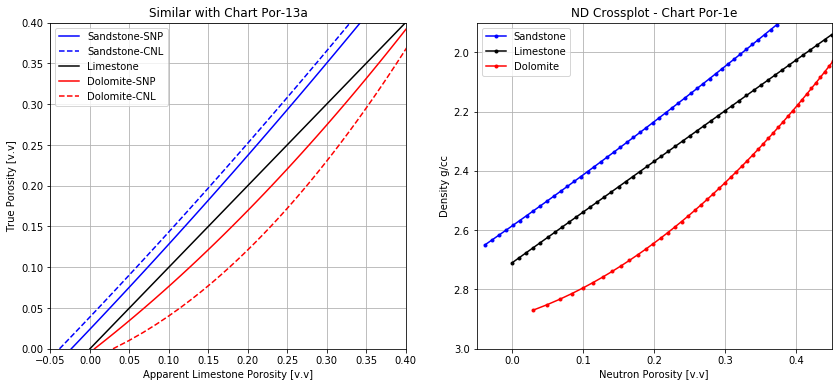

In [0]:
deeplook(1)

Second graph (right) represents what we want to distinguish between sandstone, limestone, or dolomite. From this template we could estimate the "**apparent lithology**". 

Fluid density for brine or formation water (have salinity more than pure water), the density could be above 1 g/cc. However, as pressure and temperature increases, fluid density decreases. We should first estimate the brine density in our lithology. The best approach is knowing the **pressure**, **temperature**, and **salinity** in the formation, then use mathematical approach by Batzle and Wang (1992) to calculate brine density. 

In [0]:
import Batzle_and_Wang
from Batzle_and_Wang import BW_brine_density

temp = 158; Pp = 28; salinity = 0.011 #in percent
rhof = BW_brine_density(temp, Pp, salinity)
rhof

0.9376269873119999

The density of brine at the formation with salinity 0.011% in high P, T is 0.94 g/cc

Next, we plot the data on the RHOB vs NPHI crossplot template with the calculated density above. Our task is to determine the "**apparent lithology**".

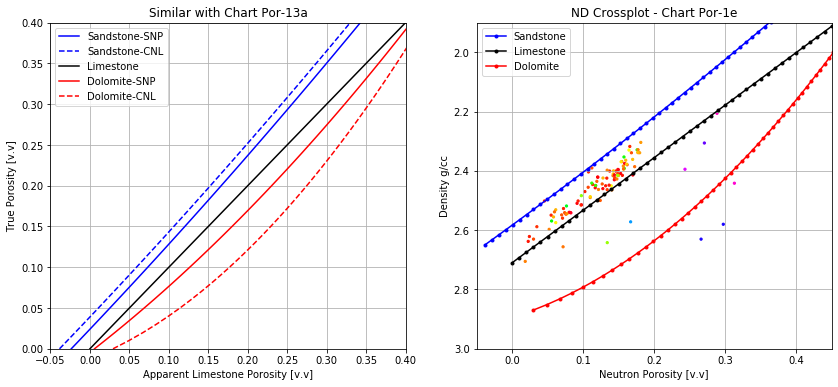

In [0]:
deeplook(rhof)
plt.scatter(log.data['NPHI'], log.data['RHOB'], c=VSH, s=5, cmap='gist_rainbow')

The plotted data appears nearer to the **Limestone line**. We could know that the apparent lithology that best describes is **limestone**. However, **pure limestone** has matrix density of 2.71 g/cc. The data might be having matrix density lower than pure limestone. 

Next our task is to estimate the **matrix density**. To estimate matrix density, we will approach the plotted data with a **line** that best fits the data. It will be called "**Matrix density line**".

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


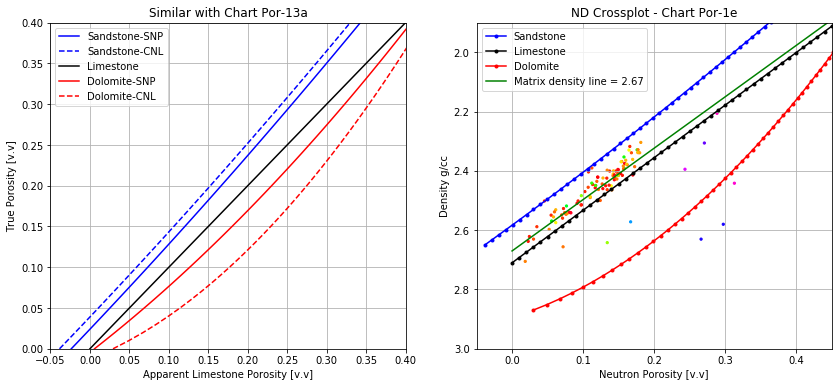

In [0]:
deeplook(rhof)

plt.subplot(122)

# limestone line
lsX = np.linspace(0,0.45,46)
rhomaa = 2.67 # this is your guess for matrix density, put any value. Here, 2.67 is the best-fitted matrix density line
denLs = (rhof - rhomaa) * lsX + rhomaa

plt.plot(lsX, denLs, '-', color='green', label='Matrix density line = 2.67')
plt.legend(loc='best')
plt.scatter(log.data['NPHI'], log.data['RHOB'], c=VSH, s=5, cmap='gist_rainbow')

# 8.2 Hydrocarbon density

Reference: [Crain's Petrophysical Handbook](https://www.spec2000.net/14-denshy.htm)

# 9.1 PHIE

In [0]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')
import neutrondensity

# 9.2 PHIE

We already know that the lithology we are studying at is limestone with matrix density of 2.67 g/cc. The density of brine in the limestone is `rhof` = 0.94 g/cc. Calculating PHIE is divided into 3 steps. 

1. Calculate porosity from density log (DPHI)

Text(0.5, 1.0, 'Density Porosity (DPHI)')

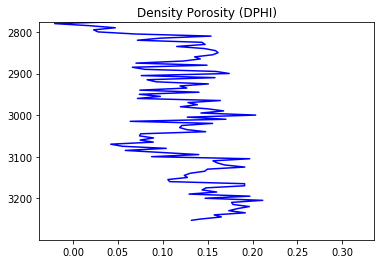

In [0]:
denma = 2.67
RHOB = np.array(log.data['RHOB'])
DPHI = (denma - RHOB) / (denma - rhof)

# Plot DPHI log
plt.plot(DPHI, depth, color='blue')
plt.ylim(topkujung, max(depth))
plt.gca().invert_yaxis()
plt.title('Density Porosity (DPHI)')

2.   Calculate total porosity



Text(0.5, 1.0, 'Total Porosity (PHIT)')

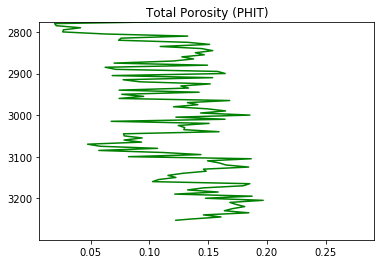

In [0]:
NPHI = np.array(log.data['NPHI'])
totalpore = np.sqrt(((DPHI**2)+(NPHI**2))/2)

# Plot PHIT log
plt.plot(totalpore, depth, color='green')
plt.ylim(topkujung, max(depth))
plt.gca().invert_yaxis()
plt.title('Total Porosity (PHIT)')

3.   Calculate effective porosity (PHIE)

Text(0.5, 1.0, 'Effective Porosity (PHIE)')

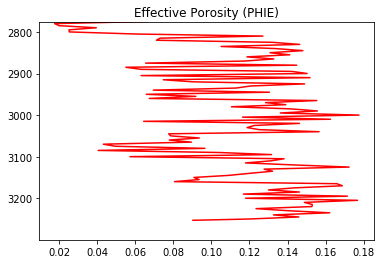

In [0]:
PHIE = (1 - VSH) * totalpore

# Plot PHIE log
plt.plot(PHIE, depth, color='red')
plt.ylim(topkujung, max(depth))
plt.gca().invert_yaxis()
plt.title('Effective Porosity (PHIE)')

Adding PHIE to the dataframe

In [0]:
PHIE = np.array(PHIE)
logfile['PHIE'] = PHIE
logfile

,Depth,GR,Perm,DT,NPHI,LLD,VSH,VP,PHIE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
691,3240.000000,16.021753,4.4897,66.966476,0.133901,7.622900,0.092044,4551.531097,0.132604
692,3245.000000,16.225132,5.2865,67.188301,0.156603,6.729800,0.093844,4536.504050,0.145884
693,3250.000000,18.759167,2.9285,65.411880,0.128000,9.459500,0.116274,4659.703982,0.119475
694,3253.000000,35.371067,2.0367,67.889717,0.112279,10.007000,0.263310,4489.634263,0.090311


# 10. Create Water Saturation Log (SW)

Resistivity data range (from Top Kujung 2777 m to end depth)

In [0]:
# call again the dataframe
logrange = logfile[(logfile.Depth >= topkujung) & (logfile.Depth <= max(depth))]
logrange

,Depth,GR,Perm,DT,NPHI,LLD,VSH,VP,PHIE
599,2780.000000,15.540564,0.0000,49.222515,0.018530,588.714172,0.087785,6192.288211,0.017729
600,2785.000000,9.131781,0.0107,54.210476,0.022723,792.423828,0.031059,5622.529499,0.020135
601,2790.000000,10.782164,0.2579,56.981140,0.034913,1370.791992,0.045667,5349.138316,0.039607
602,2795.000000,12.449538,0.0202,53.688103,0.030212,877.954285,0.060425,5677.235450,0.025263
603,2800.000000,9.585276,0.0304,57.684650,0.024372,748.017578,0.035073,5283.901311,0.025397
...,...,...,...,...,...,...,...,...,...
691,3240.000000,16.021753,4.4897,66.966476,0.133901,7.622900,0.092044,4551.531097,0.132604
692,3245.000000,16.225132,5.2865,67.188301,0.156603,6.729800,0.093844,4536.504050,0.145884
693,3250.000000,18.759167,2.9285,65.411880,0.128000,9.459500,0.116274,4659.703982,0.119475
694,3253.000000,35.371067,2.0367,67.889717,0.112279,10.007000,0.263310,4489.634263,0.090311


In [0]:
LLD_range = np.array(logrange['LLD'])
PHIE_range = np.array(logrange['PHIE'])

In [0]:
a=1 #turtuosity factor
m=2.1 #cementation factor
n=2 #saturation exponent

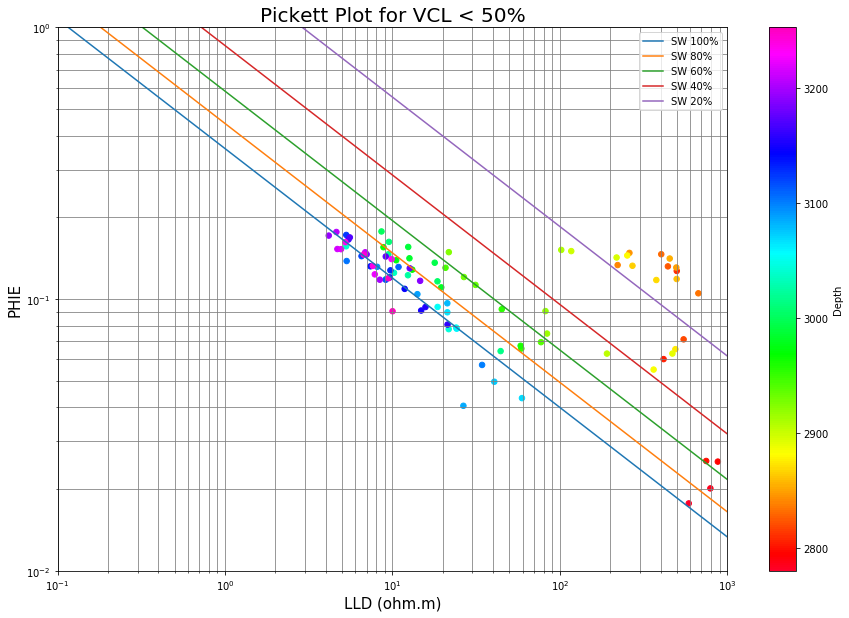

In [0]:
rwa = 0.1157       #water resistivity
vcl_limit = 0.5    #volume of clay upper limit for selction of data for graph

logrange_vclimit = logrange[logrange.VSH < vcl_limit] #sort data of LLD and PHIE with VSH < 0.5

"Pickett Plot"

import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(15, 10))
logrange_vclimit.plot.scatter(x='LLD', y='PHIE', c='Depth', s=30, colormap='gist_rainbow', ax=ax) # this is a matplotlib for dataframe
ax.set_title('Pickett Plot'+ ' for VCL < '+str(int(vcl_limit*100))+'%', size=20)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.1,1000)
ax.set_ylim(0.01,1)
ax.set_ylabel('PHIE', size=15)
ax.set_xlabel('LLD (ohm.m)', size=15)

#calculate the saturation lines
sw_plot=(1.0,0.8,0.6,0.4,0.2)
phie_plot=(0.01,1)
rt_plot=np.zeros((len(sw_plot),len(phie_plot)))
                
for i in range (0,len(sw_plot)):
    for j in range (0,len(phie_plot)):
        rt_result=((a*rwa)/(sw_plot[i]**n)/(phie_plot[j]**m))
        rt_plot[i,j]=rt_result      
for i in range(0,len(sw_plot)):
    ax.plot(rt_plot[i],phie_plot, label='SW '+str(int(sw_plot[i]*100))+'%')
    ax.legend (loc='best')
ax.grid(True, which='both',ls='-',color='gray')

Compute water saturation 

In [0]:
F = a / (logrange_vclimit.PHIE ** m)
SW = (F * rwa / logrange_vclimit.LLD)**(1/n)
SW = SW.clip(0,1) # clip values larger than 1

Plot the calculated SW log

Text(0.5, 1.0, 'Water Saturation (SW)')

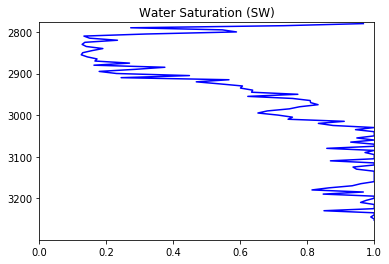

In [0]:
plt.plot(SW, logrange_vclimit.Depth, color='blue')
plt.xlim(0, 1)
plt.ylim(topkujung, max(depth))
plt.gca().invert_yaxis()
plt.title('Water Saturation (SW)')

# 11. Estimate Mineral Composition

We already have VSH log. We can calculate the non-shale minerals volume (nonVSH)

In [0]:
nonVSH = 1 - logrange.VSH

Assume the matrix composes of 3 minerals, one we already know as shale. The other two minerals can be one of these combinations:
1. Quartz + Calcite
2. Quartz + Dolomite
3. Calcite + Dolomite



To determine which one of these combinations, look back at `Step 8` NPHI vs RHOB crossplot. Our matrix density is 2.67 g/cc. The matrix density line is in between sandstone line and limestone line. So, we can estimate that the best mineral combination is: Quartz + Calcite. 